*Introduction*

    The National Basketball Association (NBA) is one of the most popular and prolific sports franchises in the Western world, amassing 285 billion minutes of watch time (Gough, 2023) and 10.58 billion USD in the 2022/2023 season (Statistica Research Department, 2023). The sport of basketball is backed by over 800 million fans worldwide (WorldAtlas, 2023), with the NBA arguably being the most popular league. The NBA draft, in particular, is one of the most anticipated sports events around the globe. Critics and fans speculate each year’s draft picks, for the prospect of rookies becoming the “next Michael Jordan”. In light of the upcoming 2024 NBA draft, this analysis looks to predict the ‘star’ potential of the most recent (2023) draft picks. The question to be answered is which, if any, of the rookies of the 2023 NBA season have the potential to become a star throughout their career, and become arguably part of the top 250 players of all time. The proposed paper will compare the rookie (first season) statistics of all players drafted from 1979 - 2020, including most of the top 250 all-time players (labelled as star), to the rookie statistics of the 2023 season’s first round draft picks in order to determine which rookie(s) in the first round draft pick have the potential to become a ‘star’, and to see if their draft ranking was justified. The dataset, “NBA Rookies 1979-2020”, will be used for this analysis. It involves 41 columns of both basic and advanced statistics describing the rookie year of every drafted NBA player (2843 players) between 1979 and 2020. 

*Methods*

	The methodology used to answer the question at hand is that of a knn-classification algorithm. This method is used because the analysis looks to classify the potential of the player as ‘All-Star’ or not. This will be done through a set of 5 chosen standardized predictors. These predictors will be selected based on their game relevance and representation of basketball proficiency. These predictors will estimate whether a rookie has ‘All-Star’ potential or not by comparing its stats with its neighbors in the data-set, determining if the rookie is similar in ability to any existing ‘All-Star’ players. This neighbor comparison will determine if they have ‘All-Star’ potential.
 
*Expected Outcomes and Impact*

	The expected outcome for this proposed analysis is that the higher draft picks are more likely to show ‘All-Star’ potential, whereas lower picks will not. This is because the draft selection process is based on a player’s success in college basketball, which is a predictor for success in the NBA. These stats theoretically should reflect themselves in the NBA and may even continue to progress as their skill develops. Conversely, they may also deteriorate, as opponents become more skilled. However, we must assume that highschool stats are representative of NBA stats, as we have no basis for this contradiction.


### Import Libraries And Set Seed

In [39]:
install.packages("themis")
library(tidyverse)
library(tidymodels)

library(recipes)


library(modeldata)
library(themis)
library(recipes)
library(GGally)
library(ggplot2)


set.seed(123)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Read Data From Web

In [40]:
players_rookie_stat <- read_csv("NBA_Rookies.csv")

New names:
• `` -> `...1`
Rows: 2842 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Team, Conf
dbl (38): ...1, Year, Age, Career, Games, MP, PTS, FG, FGA, FG%, 3P, 3PA, 3P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
head(players_rookie_stat)

...1 Player          Team Year Conf Age Career Games MP   PTS  ⋯ FTpg ORBpg
1 0    James Bailey    SEA  1979 WEST 22   9     67     726  312 ⋯ 1.01 1.06 
2 1    Billy Ray Bates POR  1980 WEST 23   4     16     235  180 ⋯ 1.75 0.81 
3 2    Larry Bird*     BOS  1979 EAST 23  13     82    2955 1745 ⋯ 3.67 2.63 
4 3    Lawrence Boston WSB  1980 EAST 23   1     13     125   56 ⋯ 0.62 1.46 
5 4    Dudley Bradley  IND  1979 EAST 22   9     82    2027  688 ⋯ 1.66 0.84 
6 5    Bill Cartwright NYK  1979 EAST 22  15     82    3150 1781 ⋯ 5.50 2.37 
  DRBpg TRBpg ASTpg STLpg BLKpg TOVpg PFpg Target
1 1.88   2.9  0.4   0.31  0.81  1.18  1.73 1     
2 1.00   1.8  1.9   0.88  0.12  1.25  1.62 1     
3 7.76  10.4  4.5   1.74  0.65  3.21  3.40 1     
4 1.54   3.0  0.2   0.31  0.15  0.62  1.92 0     
5 1.88   2.7  3.1   2.57  0.59  2.02  2.37 1     
6 6.49   8.9  2.0   0.59  1.23  2.71  3.40 1

Here we loaded in all necessary libraries for the needed functions. We read in the dataset “NBA Rookies 1979-2020” which contains the statistics of every rookie player from those seasons. This is the data we will use to classify the rookie players of 2023.


### Input List Of Top 250 NBA Players During 1979 - 2020 (we consider them stars)

In [42]:
# vector of top 250 greatest players debuted between 1979 - 2020

all_time_greats <- c(
  "Kareem Abdul-Jabbar", "Larry Bird", "Kobe Bryant", "Wilt Chamberlain", "Tim Duncan",
  "Kevin Durant", "Julius Erving", "Magic Johnson", "Michael Jordan", "LeBron James",
  "Shaquille O'Neal", "Hakeem Olajuwon", "Bill Russell", "Oscar Robertson", "Bill Walton",
  "Dirk Nowitzki", "Moses Malone", "Jerry West", "John Stockton", "Karl Malone",
  "Scottie Pippen", "David Robinson", "Elgin Baylor", "Isiah Thomas", "Stephen Curry",
  "Kevin Garnett", "Charles Barkley", "Dominique Wilkins", "Dwyane Wade", "Steve Nash",
  "Patrick Ewing", "Allen Iverson", "Paul Pierce", "Clyde Drexler", "George Mikan",
  "Kevin McHale", "Gary Payton", "Jason Kidd", "Bob Cousy", "Dennis Rodman",
  "John Havlicek", "George Gervin", "Walt Frazier", "Tracy McGrady", "Chris Paul",
  "Reggie Miller", "Bob Pettit", "Elvin Hayes", "Earvin Johnson Jr.", "Artis Gilmore",
  "Ray Allen", "Russell Westbrook", "James Harden", "Kevin Love", "Grant Hill",
  "Dikembe Mutombo", "Paul Arizin", "Carmelo Anthony", "Yao Ming", "Vince Carter",
  "Dave Cowens", "George McGinnis", "Alonzo Mourning", "David Thompson", "Nate Thurmond",
  "Bob Lanier", "Hal Greer", "Sam Jones", "Alex English", "Dolph Schayes",
  "Dominique Wilkins", "Wes Unseld", "Billy Cunningham", "Connie Hawkins", "Pau Gasol",
  "Bernard King", "Ben Wallace", "Maurice Stokes", "James Worthy", "Tracy McGrady",
  "Joe Dumars", "Al Attles", "Jack Twyman", "Bill Sharman", "Neil Johnston",
  "Bill Bradley", "Dan Issel", "Nate Archibald", "Walt Bellamy", "Tom Heinsohn",
  "Bob McAdoo", "Paul Silas", "Lenny Wilkens", "Slater Martin", "Arnie Risen",
  "Gail Goodrich", "Billy Cunningham", "Joe Fulks", "Tom Gola", "Clyde Lovellette",
  "Dave DeBusschere", "Bill Laimbeer", "Tom Sanders", "Paul Westphal", "Harry Gallatin",
  "Jo Jo White", "Robert Parish", "Dave Bing", "Cliff Hagan", "Spencer Haywood",
  "Tommy Heinsohn", "Don Nelson", "Dick Barnett", "Tom Meschery", "Tom Van Arsdale",
  "Jamaal Wilkes", "Larry Foust", "Ed Macauley", "Truck Robinson", "Gene Shue",
  "Reggie Theus", "Dick McGuire", "Kiki Vandeweghe", "Paul Westphal", "Dave Cowens",
  "Bob Boozer", "Dwight Howard", "Elton Brand", "Mark Price", "Joe Johnson",
  "Chris Webber", "Adrian Dantley", "Bernard King", "Ben Wallace", "Rasheed Wallace",
  "Dikembe Mutombo", "Shawn Kemp", "Horace Grant", "Andre Iguodala", "Marc Gasol",
  "Tony Parker", "Manu Ginobili", "Pau Gasol", "Chauncey Billups", "Vlade Divac",
  "Mehmet Okur", "Detlef Schrempf", "Peja Stojakovic", "Antawn Jamison", "LaMarcus Aldridge",
  "Goran Dragić", "Luol Deng", "Rudy Gobert", "Lamar Odom", "Shane Battier",
  "Brent Barry", "Mike Bibby", "Bradley Beal", "Marc Gasol", "Kevin Love",
  "Blake Griffin", "Kyle Lowry", "Kemba Walker", "Al Horford", "DeMar DeRozan",
  "Draymond Green", "Klay Thompson", "DeAndre Jordan", "Paul George", "Gordon Hayward",
  "DeMarcus Cousins", "Kyrie Irving", "Joel Embiid", "Nikola Jokic", "Kawhi Leonard",
  "Damian Lillard", "Jimmy Butler", "Luka Dončić", "Jayson Tatum", "Donovan Mitchell",
  "Devin Booker", "Zion Williamson", "Trae Young", "Ben Simmons", "Brandon Ingram",
  "Jamal Murray", "Jaylen Brown", "De'Aaron Fox", "Shai Gilgeous-Alexander", "Michael Porter Jr.",
  "LaMelo Ball", "Collin Sexton", "D'Angelo Russell", "John Collins", "Jarrett Allen",
  "Domantas Sabonis", "Bam Adebayo", "Dejounte Murray", "Fred VanVleet", "Jaren Jackson Jr.",
  "Mikal Bridges", "Tyler Herro", "Lonzo Ball", "Tyrese Haliburton", "Anfernee Simons",
  "Cam Reddish", "Kevin Huerter", "Mitchell Robinson", "Dillon Brooks", "Jarrett Culver",
  "Cameron Johnson", "Jaxson Hayes", "Rui Hachimura", "Coby White", "Matisse Thybulle",
  "RJ Barrett", "Sekou Doumbouya", "Nickeil Alexander-Walker", "Brandon Clarke", "Keldon Johnson",
  "Goga Bitadze", "Grant Williams", "Eric Paschall", "Jordan Poole", "Bruno Fernando",
  "Mfiondu Kabengele", "Carsen Edwards", "Chuma Okeke", "Nicolo Melli", "Terence Davis",
  "Ignas Brazdeikis", "Talen Horton-Tucker", "KZ Okpala", "Alen Smailagić", "Jordan Bone",
  "Skal Labissière", "Cheick Diallo", "Deyonta Davis", "Malachi Richardson", "Zhou Qi",
  "Isaiah Whitehead", "Demetrius Jackson", "Brice Johnson", "Stephen Zimmerman", "Isaiah Cousins",
  "Taurean Prince", "Dejounte Murray", "Malcolm Brogdon", "Ivica Zubac", "Michael Gbinije",
  "Georgios Papagiannis", "Damian Jones", "Cheick Diallo", "Malachi Richardson", "Brice Johnson",
  "Ivica Zubac", "DeAndre Bemb")


### make all names in this list lower case for ease of comparison
all_time_greats_lower <- tolower(all_time_greats)

Next we created a vector which included a list of the top 250 players in NBA history. This was done so that we could identify them in the data set and classify them as an all-star or not. This would allow us to compare stats of new rookies to those of past rookies. Depending on how similar they are to the rookie seasons of the top 250 players will allow us to predict if they have all star potential or not.


Now we selected five columns to form our dataset for prediction model:
- player name (Play)
- average points per game (PTSpg)
- average assists per game (ASTpg)
- average rebounds per game (TRBpg)

Average point per game:
- This is perhaps the most obvious metric to consider. The ability to score high points per game directly contributes to victory.

Average assists per game:
- This metric means how many points of the game did the player influenced on, though not directly scored by the player. Most of the time, this means that a pass has been made by the player to a second player causing the second player to score for the team. This metric also contributes significantly to scoring points and winning the game. Most star players are also great team players, and having a large amount of assists indicates higher player quality in team work and contribution towards victory.

Average rebounds per game:
- A rebound means when a shot missed, the player obtained the control of the ball from it bouncing off the backboard. This metric may not seem as significant as the first three metrics, but rebounding had always been a crucial part of basketbal and a main component of defense. When either the opposing team or own team misses a shot, if the player is able to retrieve the ball, then the player revives the scoring possibility. Having lots of rebounds means the player had grabbed many ball control for the team, therefore directly leading to more scoring for the team, as well as preventing opposing team players to attempt a second shot after missing.


These four metrics are the most unbiased and crucial component of a successful basketball player. We have neglected many other important metrics due to certain bias in them, such as three-pointer accuracy, average steals per game, and average blocks per games, since these would occur more frequently in certain positions than other and cannot effectively reflect a player's efficiency on the court. A player can be a bad three point shooter but can still score lots of points through closer range shots and dunks. A player may also focus more on offense than defense, therefore having less steals and blocks, but still contributes a lot to the victory of the team.

### Data Wrangling

In [43]:
selected_stats <- mutate(players_rookie_stat, avg_field_attempts = FGA / Games, name = Player, avg_points = PTSpg, avg_assists = ASTpg, avg_rebounds = TRBpg) |> 
select(name, avg_points, avg_assists, avg_rebounds) |>
mutate_all(tolower) |> mutate_all(~ gsub("\\*", "", .))
                           
final_stats <- setNames(selected_stats, tolower(colnames(selected_stats))) |> mutate(is_star = name %in% all_time_greats_lower) |> 
mutate(is_star = as_factor(is_star)) |> mutate(is_star = fct_recode(is_star, "not_star" = "FALSE", "star" = "TRUE")) |>
mutate(across(c(avg_points:avg_rebounds), as.numeric))


head(final_stats, 10)


name            avg_points avg_assists avg_rebounds is_star 
1  james bailey     4.7       0.4          2.9         not_star
2  billy ray bates 11.3       1.9          1.8         not_star
3  larry bird      21.3       4.5         10.4         star    
4  lawrence boston  4.3       0.2          3.0         not_star
5  dudley bradley   8.4       3.1          2.7         not_star
6  bill cartwright 21.7       2.0          8.9         not_star
7  jeff cook        5.5       1.3          3.7         not_star
8  hollis copeland  5.7       1.1          2.1         not_star
9  john coughran    2.8       0.5          0.8         not_star
10 terry crosby     1.5       1.8          0.3         not_star

After selecting the desired predictors (average points, average rebounds, average assists) we performed data wrangling in order to set the stage for our classification. We began by turning all the predictor variables to lowercase using mutate and tolower, as well as removing any unwanted symbols. We used mutate for the wrangling in order to alter the columns we had selected. We then used mutate to create a new column that would classify players in the data set as all stars or not depending on whether their name was in the vector we previously created. Instead of having boolean values for our classes, we rename them as "star" for TRUE and "not_star" for FALSE. This allows us to compare the vector we made to the data set to identify the current all stars in the data. We also changed the all_star variable to a factor so that we can use it as our classifier variable in the classification. We then used mutate again to turn every predictor variable to a numerical value so that our classification is based on distance calculated via each value.


### Check Star vs Non-Star proportions in the Data

In [44]:
final_stats |>
  group_by(is_star) |>
  summarize(`proportion_%` = n() / nrow(final_stats) * 100,
           rows = n())

is_star  proportion_% rows
1 not_star 95.39057     2711
2 star      4.60943      131

Using the group_by and summarize functions, we generated summary stats outlining the proportion of star vs non-star players. Based on these stats, we see that only 4.6% of players in this data set are stars.


### Split And Upsample
- From above, since we have way more non-star players than star players, we need to use step_upsample() to make the proportions equal fopr BOTH training and testing dataset FIRST, then use these two upsampled datasets as the actual training and testing set later
- After we upsample the original dataset, we then split it as usual

In [45]:
recipe <- recipe(is_star ~ avg_points + avg_assists + avg_rebounds, data = final_stats) |>
step_upsample(is_star, over_ratio = 1, skip = FALSE) 

scaled_stats <- recipe |> prep() |> bake(final_stats)



stats_split <- initial_split(scaled_stats, prop = 0.75, strata = is_star)
stats_train <- training(stats_split)
stats_test <- testing(stats_split)




stats_train |>
  group_by(is_star) |>
  summarize(`proportion_%` = n() / nrow(final_stats) * 100, rows = n())

stats_test |>
  group_by(is_star) |>
  summarize(`proportion_%` = n() / nrow(final_stats) * 100, rows = n())



is_star  proportion_% rows
1 not_star 71.53413     2033
2 star     71.53413     2033

is_star  proportion_% rows
1 not_star 23.85644     678 
2 star     23.85644     678

Before performing our classification, we must standardize and organize our data. First, we used the functions stats_split, stats_train and stats_test to split our data into training and testing sets. This was done to identify the most effective k value and to determine the efficacy of our model before applying our classifier to the test set. We chose to make our training set 75% of the data to ensure that we created an accurate model for classification. Although 25% of the data does not sound very big, considering the size of the data set we determined it was sufficient. We also upscaled our data to balance the proportion of star vs non-star points so that our data does not overwhelmingly favour one class. 


### Exploratory Visualization On Each Predictor

Next, we performed a visualization using ggplot and geom_point to create scatter plots that help us better understand the relationship between our selected stats and the star status of our players. We noted our observations on the data and used these graphs to help shape the rest of our analysis.

- We expect an upward trend for both plots since it is the higher the better player for all four predictor values
- The first graph will be average points per game (x axis) vs average field goal attempts (y-axis)
- The second graph will be average assists per game (x-axis) vs average rebounds per game (y-axis). These two variable are less related and therefore we expect the graph to be more spread out, but we will be observing star vs non-star trend rather separately on this graph for each variable.

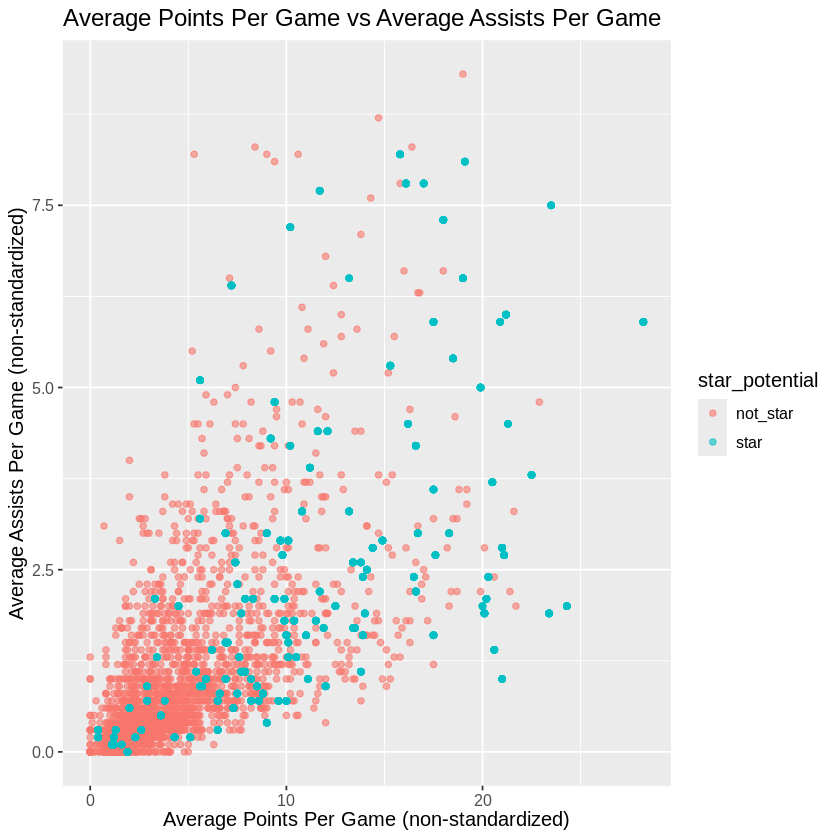

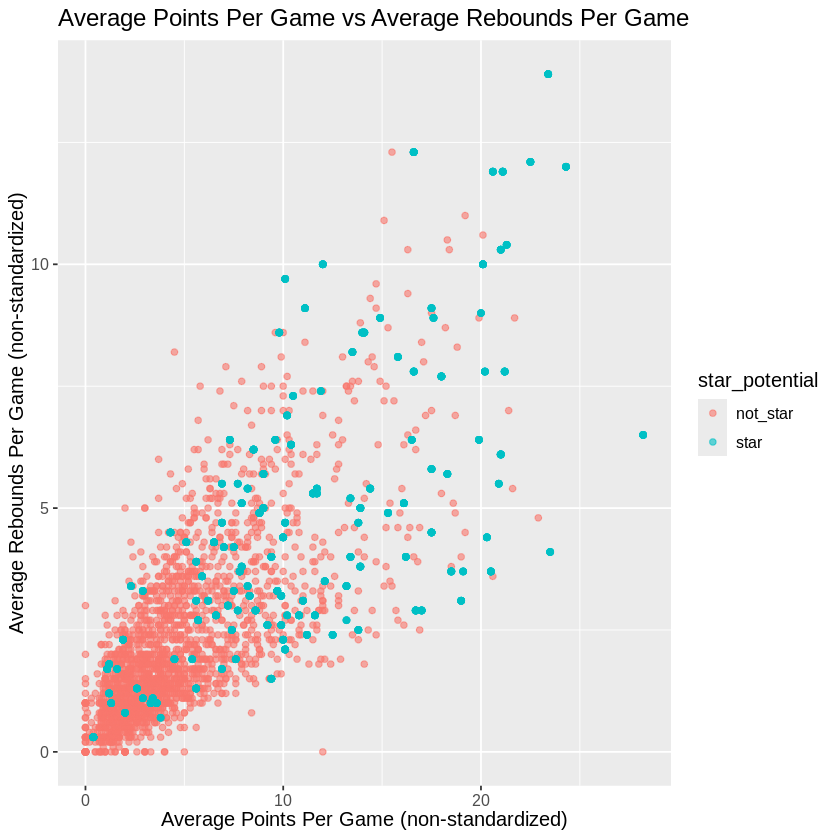

In [8]:
stats_plot <- stats_train |>
  ggplot(aes(x = avg_points, y = avg_assists, color = is_star)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Points Per Game (non-standardized)",
       y = "Average Assists Per Game (non-standardized)",
       color = "star_potential",
      title = "Average Points Per Game vs Average Assists Per Game") +
  theme(text = element_text(size = 12))

stats_plot



stats_plot_2 <- stats_train |>
  ggplot(aes(x = avg_points, y = avg_rebounds, color = is_star)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Points Per Game (non-standardized)",
       y = "Average Rebounds Per Game (non-standardized)",
       color = "star_potential",
      title = "Average Points Per Game vs Average Rebounds Per Game") +
  theme(text = element_text(size = 12))

stats_plot_2

### Observation From Above Two Visualizations
First graph:
- the first graph's result is exactly what we expected.
- The super-obvious positive linear relationship between average points per game and average assists per game basically indicates both scoring and assisting in scoring comes in a full package for players.
- We can see that the blue points (star) tend to concentrate towards top right. It is important to note that it is normal for the spread to happen and the points not heavily concentrated at top right, since some star players may be more defense-driven and have higher rebounds rather than scoring and assisting. Since we are taking into consideration all three predictors, this variation in average points and average assists for star players is okay.
- Meanwhile the non-star players are heavily concentrated at the bottom left, indicating less assists and less points scored.

<br>

Second Graph
- When it comes to rebounds, the same trend between star and non-star players continue
- First of all, it is completely normal to have a rather spread out positive relationship, since these two variable are not directly related to each other unlike the first graph.
- However, we can see that non-star player (red) are heavily concentrated at bottom left, indicating few rebounds and average points per game.
- Meanwhile, the star players have a much more outwards spread, indicating a general increase in rebounds and points compared to non-star players.
- This spread is okay because first of all, it still highlights that star players generally get more rebounds. At the same time, since we are considering all four predictors equally, it is okay to have variations in assists and rebounds since some star players may be a really good scorer but less effective in defensive play

### Standardize Training Data

In [9]:
recipe_new <- recipe(is_star ~ avg_points + avg_assists + avg_rebounds, data = stats_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
step_impute_mean(all_predictors()) 




Before we choose our ideal k value, we must create a recipe for our data. We created a recipe that standardized our selected predictors and filled any missing values using step_inpute_mean in the data set to preserve as many observations as possible. We applied this model to our training set. By standardizing our data we can ensure that each variable is treated equally in the same proportions and that our classifier does not have any biases towards any one variable.

### Choosing Best K Values



neighbors .metric  .estimator mean      n std_err     .config              
1   1        accuracy binary     0.9722080 5 0.003939350 Preprocessor1_Model01
2   2        accuracy binary     0.9731908 5 0.003638427 Preprocessor1_Model02
3   3        accuracy binary     0.9522863 5 0.003679173 Preprocessor1_Model03
4   4        accuracy binary     0.9520400 5 0.003813906 Preprocessor1_Model04
5   5        accuracy binary     0.9276867 5 0.004869783 Preprocessor1_Model05
6   6        accuracy binary     0.9276867 5 0.004869783 Preprocessor1_Model06
7   7        accuracy binary     0.9043215 5 0.005166572 Preprocessor1_Model07
8   8        accuracy binary     0.9043215 5 0.005166572 Preprocessor1_Model08
9   9        accuracy binary     0.8883383 5 0.003317719 Preprocessor1_Model09
10 10        accuracy binary     0.8883383 5 0.003317719 Preprocessor1_Model10
11 11        accuracy binary     0.8713681 5 0.002280882 Preprocessor1_Model11
12 12        accuracy binary     0.8713681 5 0.002280882 Preprocessor1_Model12
13 13        accuracy binary     0.8571017 5 0.003395496 Preprocessor1_Model13
14 14        accuracy binary     0.8571017 5 0.003395496 Preprocessor1_Model14
15 15        accuracy binary     0.8462794 5 0.004704190 Preprocessor1_Model15
16 16        accuracy binary     0.8462794 5 0.004704190 Preprocessor1_Model16
17 17        accuracy binary     0.8403838 5 0.006304612 Preprocessor1_Model17
18 18        accuracy binary     0.8403838 5 0.006304612 Preprocessor1_Model18
19 19        accuracy binary     0.8302998 5 0.005994208 Preprocessor1_Model19
20 20        accuracy binary     0.8302998 5 0.005994208 Preprocessor1_Model20
21 21        accuracy binary     0.8241458 5 0.007204221 Preprocessor1_Model21
22 22        accuracy binary     0.8241458 5 0.007204221 Preprocessor1_Model22
23 23        accuracy binary     0.8174956 5 0.007118227 Preprocessor1_Model23
24 24        accuracy binary     0.8174956 5 0.007118227 Preprocessor1_Model24
25 25        accuracy binary     0.8123340 5 0.005364090 Preprocessor1_Model25
26 26        accuracy binary     0.8123340 5 0.005364090 Preprocessor1_Model26
27 27        accuracy binary     0.8108647 5 0.003907566 Preprocessor1_Model27
28 28        accuracy binary     0.8108647 5 0.003907566 Preprocessor1_Model28
29 29        accuracy binary     0.8111086 5 0.005762878 Preprocessor1_Model29
30 30        accuracy binary     0.8111086 5 0.005762878 Preprocessor1_Model30
31 31        accuracy binary     0.8101312 5 0.003072278 Preprocessor1_Model31
32 32        accuracy binary     0.8101312 5 0.003072278 Preprocessor1_Model32
33 33        accuracy binary     0.8106232 5 0.004410144 Preprocessor1_Model33
34 34        accuracy binary     0.8106232 5 0.004410144 Preprocessor1_Model34
35 35        accuracy binary     0.8071816 5 0.004155297 Preprocessor1_Model35
36 36        accuracy binary     0.8071816 5 0.004155297 Preprocessor1_Model36
37 37        accuracy binary     0.8074279 5 0.003855012 Preprocessor1_Model37
38 38        accuracy binary     0.8074279 5 0.003855012 Preprocessor1_Model38
39 39        accuracy binary     0.8079217 5 0.003410259 Preprocessor1_Model39
40 40        accuracy binary     0.8079217 5 0.003410259 Preprocessor1_Model40
41 41        accuracy binary     0.8064463 5 0.003132859 Preprocessor1_Model41
42 42        accuracy binary     0.8064463 5 0.003132859 Preprocessor1_Model42
43 43        accuracy binary     0.8037382 5 0.003051878 Preprocessor1_Model43
44 44        accuracy binary     0.8037382 5 0.003051878 Preprocessor1_Model44
45 45        accuracy binary     0.8012757 5 0.001967204 Preprocessor1_Model45
46 46        accuracy binary     0.8012757 5 0.001967204 Preprocessor1_Model46
47 47        accuracy binary     0.7995582 5 0.001665352 Preprocessor1_Model47
48 48        accuracy binary     0.7995582 5 0.001665352 Preprocessor1_Model48
49 49        accuracy binary     0.7995576 5 0.002716745 Preprocessor1_Model49
50 50        accuracy binary     0.7993119 5 0.002805

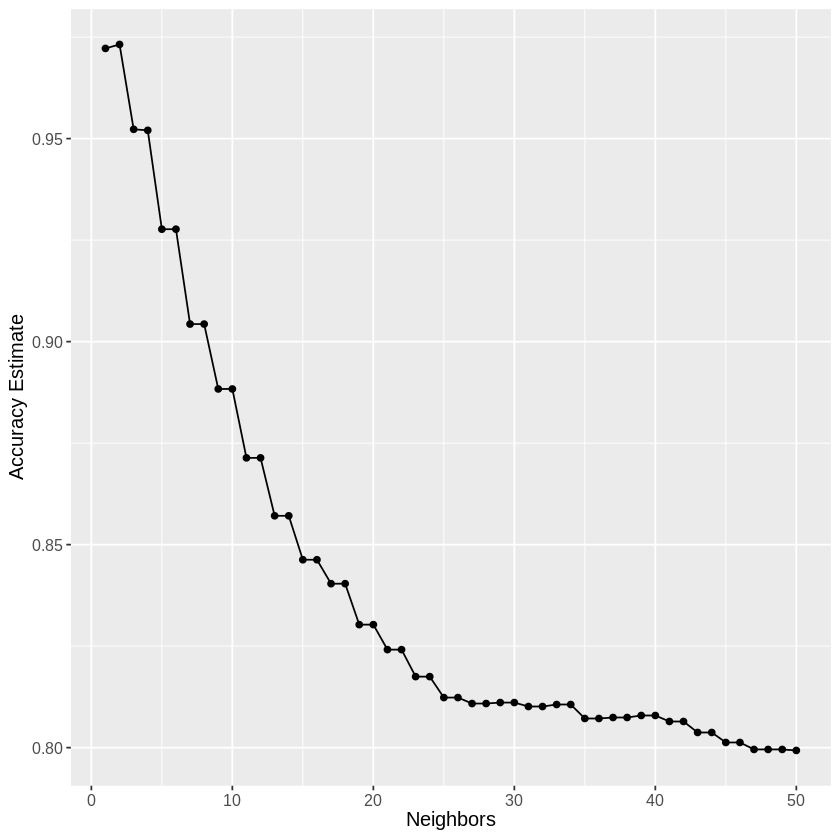

In [10]:

stats_vfold <- vfold_cv(stats_train, v = 5, strata = is_star)


knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))


knn_results <- workflow() |>
  add_recipe(recipe_new) |>
  add_model(knn_spec) |>
  tune_grid(resamples = stats_vfold, grid = k_vals) |>
  collect_metrics()


accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k



We then used 5 fold cross validation for calculating each k value accuracy for a reduced uncertainty error, while preserving computation power. We started with k = 1, incremented by 1 every time, all the way up to 50, since our dataset is relatively big. We then sorted the accuracy of each k value in descending order as well as plotted these accuracies against the k values to determine the best k value. We picked the one on the top (highest accuracy) which ended up being k = 2. The reason is that the accuracy is extremely high at the beginning (very small k v). For this specific prediction about NBA rookie star potential, we believe that accuracy metric alone is enough. The recall and precision don't matter as much since we are treating both star and non-star labels equally (one doesn’t matter more than the other they are both equally as important).

### Data Wrangling for 2023-2024 Rookie Data (Top 20 Rookies in First Round Pick)
- There are in total of 58 players drafted in 2023, but we will only pick top 20 rookies ranked by draft order
- Higher draft order typically means the rookie has shown higher capability during their college basketball seasons, which causes many teams to want to draft them, therefore getting drafted earlier due to their popularity
- We will create the tibble by manually inputting the rookie stats from official NBA website

In [11]:
# Load the required library
library(tibble)

# Define your data
column_names <- c("name", "avg_points", "avg_assists", "avg_rebounds")
observations <- c("Victor Wembanyama", 21.4, 3.9, 10.6,
                   "Brandon Miller", 17.3, 2.4, 4.3,
                   "Chet Holmgren", 16.6, 2.5, 7.9,
                 "Scoot Henderson", 14.0, 5.4, 3.1,
                 "GG Jackson", 13.9, 1.2, 3.9,
                 "Keyonte George", 12.9, 4.4, 2.8,
                  
                 "Cam Whitmore", 12.1, 0.6, 3.8,
                 "Jaime Jaquez Jr.", 11.8, 2.6, 3.8,
                 "Amen Thompson", 9.4, 2.5, 7.9,
                 "Brandin Podziemski", 9.2, 3.7, 5.7,
                 "Duop Reath", 9.0, 1.0, 3.6,
                 "Ausar Thompson", 8.8, 1.9, 6.4,
                 "Dereck Lively II", 8.8, 1.1, 6.9,
                 "Tristan Vukcevic", 8.5, 1.3, 3.6,
                  
                 "Bilal Coulibaly", 8.4, 1.7, 4.1,
                 "Gradey Dick", 8.4, 1.1, 2.2,
                 "Marcus Sasser", 8.1, 3.3, 1.7,
                 "Trayce Jackson-Davis", 7.9, 1.2, 5.1,
                 "Jordan Hawkins", 7.8, 1.0, 2.2,
                 "Toumani Camara", 7.5, 1.2, 4.9)


# Create a tibble
rookies <- tibble(
  name = observations[seq(1, length(observations), by = 4)],
  avg_points = observations[seq(2, length(observations), by = 4)],
  avg_assists = observations[seq(3, length(observations), by = 4)],
  avg_rebounds = observations[seq(4, length(observations), by = 4)]
)

head(rookies, 5)

rookies_predict <- rookies |> select(avg_points:avg_rebounds) |> mutate(across(c(avg_points:avg_rebounds), as.numeric))

head(rookies_predict, 5)

name              avg_points avg_assists avg_rebounds
1 Victor Wembanyama 21.4       3.9         10.6        
2 Brandon Miller    17.3       2.4         4.3         
3 Chet Holmgren     16.6       2.5         7.9         
4 Scoot Henderson   14         5.4         3.1         
5 GG Jackson        13.9       1.2         3.9

avg_points avg_assists avg_rebounds
1 21.4       3.9         10.6        
2 17.3       2.4          4.3        
3 16.6       2.5          7.9        
4 14.0       5.4          3.1        
5 13.9       1.2          3.9

Here we took stats from the official NBA website to add new rookie players from the 2023-2024 NBA season to our data set in order to predict their class. We created a tibble using their stats so that we can mutate their stats to be identical to the dataset as well as select the same columns that were used as predictors. This removes any sorts of computational issues that may arise since these values are not from within the data set.


### Test Model Accuracy Using Test Data

In [37]:
stats_test |>
  group_by(is_star) |>
  summarize(rows = n())



knn_spec_new <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = 2) |>
  set_engine("kknn") |>
  set_mode("classification")


knn_fit <- workflow() |>
  add_recipe(recipe_new) |>
  add_model(knn_spec_new) |>
  fit(data = stats_train)


stats_predictions <- predict(knn_fit, stats_test) |>
  bind_cols(stats_test)


accuracy <- stats_predictions |>
  metrics(truth = is_star, estimate = .pred_class) |>
  filter(.metric == "accuracy")

accuracy


is_star  rows
1 not_star 678 
2 star     678

.metric  .estimator .estimate
1 accuracy binary     0.9675516

We then created another workflow using a new model specification that uses our chosen k value of 2 and  the recipe that we previously made. We fit this model to the test data. We then tested the accuracy of our model to assess how well it can predict our stars. Here we find that our model has an accuracy of 97%.

### Make Actual Predictions on 2023 Rookies!

Finally we use our classification model to predict the classes of the 2023-2024 rookies to determine if they have star potential.

In [38]:
actual_predictions <- predict(knn_fit, rookies_predict) |>
  bind_cols(rookies)

actual_predictions

.pred_class name                 avg_points avg_assists avg_rebounds
1  star        Victor Wembanyama    21.4       3.9         10.6        
2  not_star    Brandon Miller       17.3       2.4         4.3         
3  not_star    Chet Holmgren        16.6       2.5         7.9         
4  not_star    Scoot Henderson      14         5.4         3.1         
5  not_star    GG Jackson           13.9       1.2         3.9         
6  not_star    Keyonte George       12.9       4.4         2.8         
7  not_star    Cam Whitmore         12.1       0.6         3.8         
8  not_star    Jaime Jaquez Jr.     11.8       2.6         3.8         
9  star        Amen Thompson        9.4        2.5         7.9         
10 star        Brandin Podziemski   9.2        3.7         5.7         
11 not_star    Duop Reath           9          1           3.6         
12 not_star    Ausar Thompson       8.8        1.9         6.4         
13 not_star    Dereck Lively II     8.8        1.1         6.9         
14 not_star    Tristan Vukcevic     8.5        1.3         3.6         
15 not_star    Bilal Coulibaly      8.4        1.7         4.1         
16 not_star    Gradey Dick          8.4        1.1         2.2         
17 not_star    Marcus Sasser        8.1        3.3         1.7         
18 star        Trayce Jackson-Davis 7.9        1.2         5.1         
19 not_star    Jordan Hawkins       7.8        1           2.2         
20 not_star    Toumani Camara       7.5        1.2         4.9



Bibliography
Gough, C. (2023, December 19). Most watched sports leagues in the US 2023. Statista. https://www.statista.com/statistics/1430289/most-watched-sports-leagues-usa/
The most popular sports in the world. WorldAtlas. (2023, September 13). https://www.worldatlas.com/articles/what-are-the-most-popular-sports-in-the-world.html
Published by Statista Research Department, & 28, N. (2023, November 28). Total NBA League Revenue 2023. Statista. https://www.statista.com/statistics/193467/total-league-revenue-of-the-nba-since-2005/#:~:text=During%20the%202022%2F23%20season,dollars%20from%20the%20previous%20year. 

### Discussion

In general, our analysis did not fit our prediction that higher draft picks were more likely to be stars. Although our model did score 97% in accuracy, we found that some of the players that we expected to be classified as a star were categorized as non-star. Furthermore, some of the lower ranked players that seemingly had worse stats (such as Trayce Jackson-Davis) were classified as a star. There are many potential reasons for this, however our current theory behind this result is that some of the neglected basketball metrics that we did not include in our predictors may have a greater impact on star potential than expected. This theory, however, requires further exploration in order to determine its validity. A future study could try and compare the effectiveness of different predictor variables when trying to determine star potential in order to understand which predictors are the most important for star potential.

Although we found mixed results when using k = 2, other k values that were supposedly less accurate provided seemingly stronger results (i.e. they fit our hypothesis better and selected the players as stars that had higher stats). Interestingly, when using k = 1 as a predictor we find that many of the higher ranked players did fit our prediction. The reason for this is unknown, and further replication or differing approaches to this analysis may help us to understand why.

There is much utility that can be extracted from this model. Teams can utilize this model to better choose their players during each draft, shaping team fanbases. It can also help build personal interest among fans. Furthermore, creating more excitement around upcoming prospects will create a larger NBA following, therefore creating more jobs and building the Western economy. This model may also shed light into new questions and avenues of investigation for basketball. How accurate is the NBA draft at ranking the best prospects? How well do players carry over from college basketball to the NBA? Which statistics are the greatest predictors for success in the NBA? 	

Limitations of this study included time and resources. Questions such as the weight of different stats on predicted NBA success were not within the scope of this experiment as we lacked the necessary tools and time. However, we hope that this analysis has helped to shed light into our understanding of basketball statistics and their validity when predicting a player's success. Although seemingly trivial, this analysis may provide insights into one of the most popular sports: basketball (Veroutsos, E., 2023).
